# **Assignment**


 **Data Loading & Preview**

In [3]:
import pandas as pd
import numpy as np

mydata = pd.read_csv('kc_house_data.csv')

print(mydata)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

**Data Cleaning - Checking for null values**

In [5]:
print(mydata.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [6]:
mydata['sqft_above'] = mydata['sqft_above'].fillna(mydata['sqft_above'].median())

print(mydata.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


**Correctly Assigning data type to all the variables**

In [8]:
mydata['date'] = mydata['date'].str.replace('T', '', regex=False)

mydata['date'] = pd.to_datetime(mydata['date'], format='%Y%m%d%H%M%S')

print(mydata['date'].dtype)

datetime64[ns]


In [9]:
mydata['price'] = pd.to_numeric(mydata['price'], errors='coerce')
mydata['sqft_living'] = pd.to_numeric(mydata['sqft_living'], errors='coerce')
mydata['sqft_lot'] = pd.to_numeric(mydata['sqft_lot'], errors='coerce')

print(mydata.dtypes)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


**Dummy Variable Process for column 'view'**

In [11]:
view_dummies = pd.get_dummies(mydata['view'], prefix='view', drop_first=False)
mydata = pd.concat([mydata, view_dummies], axis=1)
print(mydata.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view_0', 'view_1',
       'view_2', 'view_3', 'view_4'],
      dtype='object')


In [12]:
view_columns = [col for col in mydata.columns if col.startswith('view')]
mydata[view_columns] = mydata[view_columns].astype(int)

print(mydata[view_columns].dtypes)

view      int32
view_0    int32
view_1    int32
view_2    int32
view_3    int32
view_4    int32
dtype: object


In [13]:
mydata = mydata.loc[:, ~mydata.columns.duplicated()]

# **The 4 to 6 most important house specifications for predicting the house's price with practical search algorithms**

In [15]:
corr_matrix = mydata.corr()

print(corr_matrix['price'].sort_values(ascending=False))

price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605559
sqft_living15    0.585374
bathrooms        0.525134
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
view_4           0.307921
lat              0.306919
waterfront       0.266331
floors           0.256786
view_3           0.182936
view_2           0.148470
yr_renovated     0.126442
view_1           0.092596
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
condition        0.036392
long             0.021571
date            -0.004366
id              -0.016797
zipcode         -0.053168
view_0          -0.359176
Name: price, dtype: float64


# **The Process of 4 to 6 most important house specifications finding with graph**

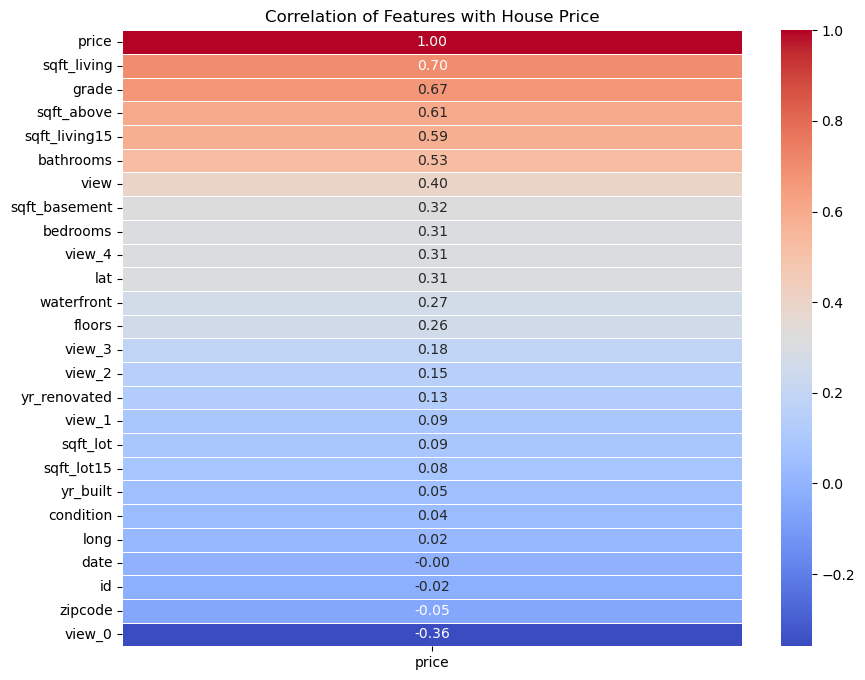

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = mydata.corr()

sorted_corr = corr_matrix[['price']].sort_values(by='price', ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(sorted_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Features with House Price')
plt.show()

# **Multiple linear regression with the output variable Price and set of selected inputs**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = mydata[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'sqft_basement']]
y = mydata['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

me_train = np.mean(y_train_pred - y_train)
me_test = np.mean(y_test_pred - y_test)

mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Training set - MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, ME: {me_train:.4f}, MAPE: {mape_train:.4f}%, MAE: {mae_train:.4f}")
print(f"Test set - MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, ME: {me_test:.4f}, MAPE: {mape_test:.4f}%, MAE: {mae_test:.4f}")

Training set - MSE: 59785499185.6234, RMSE: 244510.7343, ME: 0.0000, MAPE: 33.3689%, MAE: 160198.0904
Test set - MSE: 68398575519.5003, RMSE: 261531.2133, ME: -3325.2227, MAPE: 33.0589%, MAE: 164638.7812


# **Actual vs Predicted Prices : Test Set vs Training Set using graph ~ underfitted 

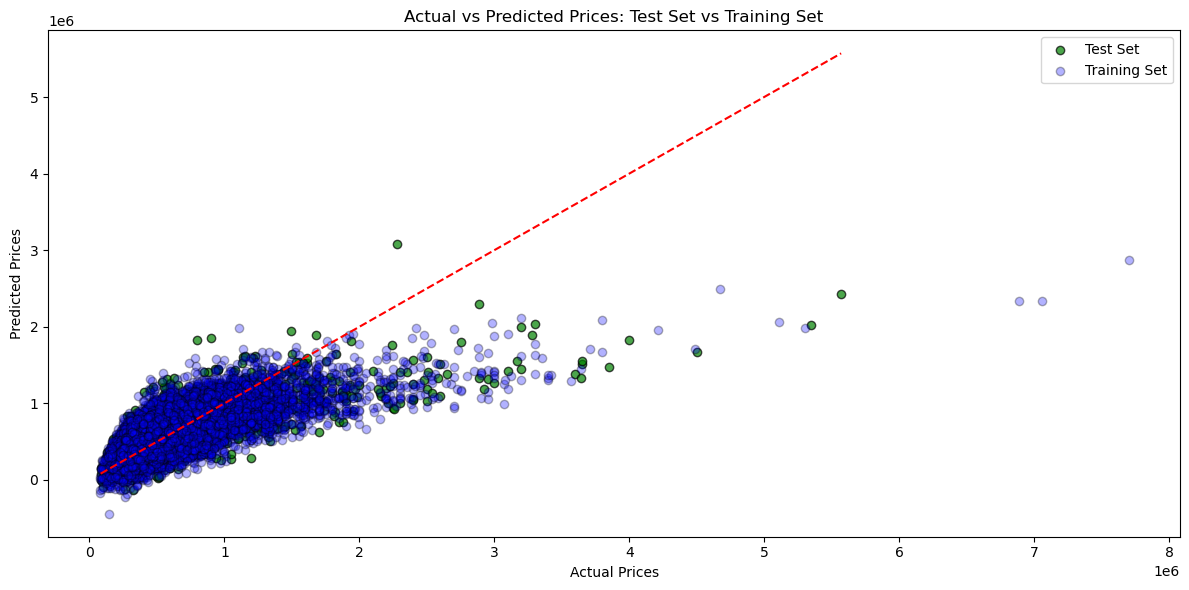

In [21]:
plt.figure(figsize=(12, 6))

plt.scatter(y_test, y_test_pred, color='green', edgecolor='black', alpha=0.7, label='Test Set')
plt.scatter(y_train, y_train_pred, color='blue', edgecolor='black', alpha=0.3, label='Training Set')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.title('Actual vs Predicted Prices: Test Set vs Training Set')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.tight_layout()
plt.show()

# **Multiple linear regression to predict the prices of the two houses in the file using the 4 to 6-house specifications selected requirement number 2**

In [23]:
X = mydata[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'sqft_basement']]
y = mydata['price']

model = LinearRegression()
model.fit(X, y)

first_two_houses = mydata.iloc[:2][['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'sqft_basement']]

predictions = model.predict(first_two_houses)

for i, prediction in enumerate(predictions, start=1):
    print(f"Predicted price for House {i}: ${prediction:,.2f}")

Predicted price for House 1: $320,020.56
Predicted price for House 2: $545,292.41


# **KNN classification models using K = 5 V/S K=10**

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

X = mydata[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'sqft_basement']]
y = mydata['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_10 = KNeighborsRegressor(n_neighbors=10)

knn_5.fit(X_train, y_train)
knn_10.fit(X_train, y_train)

y_pred_5 = knn_5.predict(X_test)
y_pred_10 = knn_10.predict(X_test)

mae_5 = mean_absolute_error(y_test, y_pred_5)
mae_10 = mean_absolute_error(y_test, y_pred_10)

mse_5 = mean_squared_error(y_test, y_pred_5)
mse_10 = mean_squared_error(y_test, y_pred_10)

rmse_5 = np.sqrt(mse_5)
rmse_10 = np.sqrt(mse_10)

r2_5 = r2_score(y_test, y_pred_5)
r2_10 = r2_score(y_test, y_pred_10)

accuracy_5 = r2_5 * 100
accuracy_10 = r2_10 * 100

print("For K = 5:")
print(f"MAE: {mae_5:.4f}, MSE: {mse_5:.4f}, RMSE: {rmse_5:.4f}, R^2: {r2_5:.4f}, Accuracy: {accuracy_5:.2f}%")

print("\nFor K = 10:")
print(f"MAE: {mae_10:.4f}, MSE: {mse_10:.4f}, RMSE: {rmse_10:.4f}, R^2: {r2_10:.4f}, Accuracy: {accuracy_10:.2f}%")

if r2_5 > r2_10:
    print("\nK=5 is better")
    best_model = knn_5
else:
    print("\nK=10 is better")
    best_model = knn_10

For K = 5:
MAE: 174068.2416, MSE: 75637935807.0478, RMSE: 275023.5186, R^2: 0.5003, Accuracy: 50.03%

For K = 10:
MAE: 168295.1384, MSE: 69343757263.4719, RMSE: 263332.0286, R^2: 0.5418, Accuracy: 54.18%

K=10 is better


# Predict the prices of the two houses in the cleaned data set file

In [27]:
first_two_houses = mydata.iloc[:2][['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'sqft_basement']]
predictions = best_model.predict(first_two_houses)

for i, prediction in enumerate(predictions, start=1):
    print(f"\nPredicted price for House {i} using the best model (K={best_model.n_neighbors}): ${prediction:,.2f}")


Predicted price for House 1 using the best model (K=10): $332,290.00

Predicted price for House 2 using the best model (K=10): $620,284.60


# **Compared the prediction performance of multiple linear regression achieved in requirement 3 and the KNN classifier achieved in requirement 4**

In [29]:

X = mydata[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'sqft_basement']]
y = mydata['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlr = LinearRegression()
knn_10 = KNeighborsRegressor(n_neighbors=10)

mlr.fit(X_train, y_train)
knn_10.fit(X_train, y_train)

y_pred_mlr = mlr.predict(X_test)
y_pred_knn = knn_10.predict(X_test)

mae_mlr = mean_absolute_error(y_test, y_pred_mlr)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("For Multiple Linear Regression (MLR):")
print(f"MAE: {mae_mlr:.4f}, MSE: {mse_mlr:.4f}, RMSE: {rmse_mlr:.4f}, R^2: {r2_mlr:.4f}")

print("\nFor KNN (K=10):")
print(f"MAE: {mae_knn:.4f}, MSE: {mse_knn:.4f}, RMSE: {rmse_knn:.4f}, R^2: {r2_knn:.4f}")

if r2_mlr > r2_knn:
    print("\nMultiple Linear Regression (MLR) is better")
else:
    print("\nKNN (K=10) is better")

For Multiple Linear Regression (MLR):
MAE: 164638.7812, MSE: 68398575519.5003, RMSE: 261531.2133, R^2: 0.5481

For KNN (K=10):
MAE: 168295.1384, MSE: 69343757263.4719, RMSE: 263332.0286, R^2: 0.5418

Multiple Linear Regression (MLR) is better


# **Proposed two extra algorithms, not included in our lecture, compared, and discussed the results**

In [31]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X_train, y_train, X_test, y_test are defined

# Train all models
lin_reg = LinearRegression().fit(X_train, y_train)
knn_10 = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predictions
y_pred_lr = lin_reg.predict(X_test)
y_pred_10 = knn_10.predict(X_test)
y_test_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Manually added predicted prices for House 1 and House 2 for Linear Regression
predicted_prices = {
    'Linear Regression': [
        320020.56,  # Predicted price for House 1
        545292.41   # Predicted price for House 2
    ],
    'KNN (K=10)': [
        knn_10.predict(X.iloc[0:1])[0],
        knn_10.predict(X.iloc[1:2])[0]
    ],
    'Random Forest': [
        rf_model.predict(X.iloc[0:1])[0],
        rf_model.predict(X.iloc[1:2])[0]
    ],
    'XGBoost': [
        xgb_model.predict(X.iloc[0:1])[0],
        xgb_model.predict(X.iloc[1:2])[0]
    ]
}

# Performance metrics
performance_data = {
    'Model': ['Linear Regression', 'KNN (K=10)', 'Random Forest', 'XGBoost'],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R²': [],
    'House_1_Predicted_Price': [],
    'House_2_Predicted_Price': []
}

models = [lin_reg, knn_10, rf_model, xgb_model]
model_names = ['Linear Regression', 'KNN (K=10)', 'Random Forest', 'XGBoost']
y_preds = [y_pred_lr, y_pred_10, y_test_pred_rf, y_pred_xgb]

for model, name, y_pred in zip(models, model_names, y_preds):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    performance_data['MAE'].append(mae)
    performance_data['MSE'].append(mse)
    performance_data['RMSE'].append(rmse)
    performance_data['R²'].append(r2)

    performance_data['House_1_Predicted_Price'].append(predicted_prices[name][0])
    performance_data['House_2_Predicted_Price'].append(predicted_prices[name][1])

# Format the performance data
performance_df = pd.DataFrame(performance_data).style.format({
    'MAE': '${:,.2f}',
    'MSE': '${:,.2f}',
    'RMSE': '${:,.2f}',
    'R²': '{:.4f}',
    'House_1_Predicted_Price': '${:,.2f}',
    'House_2_Predicted_Price': '${:,.2f}'
})

performance_df

,Model,MAE,MSE,RMSE,R²,House_1_Predicted_Price,House_2_Predicted_Price
0,Linear Regression,"$164,638.78","$68,398,575,519.50","$261,531.21",0.5481,"$320,020.56","$545,292.41"
1,KNN (K=10),"$168,295.14","$69,343,757,263.47","$263,332.03",0.5418,"$332,290.00","$620,284.60"
2,Random Forest,"$157,366.30","$68,336,021,727.36","$261,411.59",0.5485,"$256,332.00","$606,687.92"
3,XGBoost,"$155,421.28","$77,177,430,621.23","$277,808.26",0.4901,"$339,528.81","$614,605.31"


## **Random Forest achieves the best scores in three of the four metrics (MSE, RMSE, R²), indicating overall better performance in predictive accuracy**

# **Reference**

**Trochim, W. M. (n.d.). Dummy variables. Research Methods Knowledge Base. Retrieved from https://conjointly.com/kb/dummy-variables/**